In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("colleges_cleaned.csv")
df.head(20)

In [ ]:
df = df[['school']]
df.head(20)

In [ ]:
#df.to_csv(r'C\Users\johnshows\desktop\project\colleges_really_cleaned.csv', index = False, header = True)

In [ ]:
df = pd.read_csv("colleges_final.csv")
df.head(20)

In [ ]:
df2 = pd.read_csv("admission_data.csv")
df2.head()

In [ ]:
new_school_df = df2.rename(columns={"School":"school"})
new_school_df.head(20)

In [ ]:
first_merged_df = pd.merge(df, new_school_df, on= 'school')
first_merged_df.head(50)
                     

In [ ]:
dropped_admitted = first_merged_df[~first_merged_df.Applicatin_Status.str.contains("admitted")]
dropped_admitted.head()

In [ ]:
df=dropped_admitted
df.head()

In [ ]:
import numpy as np

In [ ]:
#trying..

for c in df.columns:
    df[c] = df[c].astype(str)
    df[c] = np.where(df[c].str.contains("fall"), df[c].str[:0], df[c])

In [ ]:
#trying........

from collections import Counter
selected_words = ['fall']
def count_words(df, selected_words):
    words_count=Counter()
    
    for sentence in df.sentences: words_count.update(x for x in sentence if x in selected_words)


In [ ]:
#this worked.. 

df.replace({'Fall':' '})

In [ ]:
df.replace({'Fall': ''},regex=True)

In [ ]:
dropped_reporting_df = df[~df.Applicatin_Status.str.contains("Reporting")]
dropped_reporting_df.head()


In [ ]:
ready_df = dropped_reporting_df.rename(columns={"Applicatin_Status": "Applicants"})
ready_df
ready_df = ready_df.rename(columns={"school":'School'})
ready_df
del ready_df['Applicants']
ready_df
ready_df.head(50)

In [ ]:
ready_df.index = pd.RangeIndex(len(ready_df.index))
ready_df.head(50)


In [ ]:
#checking to see if there is any data loss due to the difference in school names on CSV's 
#(For example: University of Colorado vs University of Colorado at Boulder)

import fuzzymatcher
from fuzzymatcher import link_table, fuzzy_left_join

In [ ]:
#ready_df.to_csv(r'C\Users\johnshows\desktop\project\applications_cleaned.csv', index = False, header = True)

In [1]:
import pandas as pd
df_left = pd.read_csv("applications_cleaned.csv")
df_right = pd.read_csv("admission_data.csv")

In [ ]:
left_on = ["School"]
right_on = ["School"]
fuzzy_df = fuzzymatcher.link_table(df_left, df_right, left_on, right_on)
fuzzy_df.head()

## End of Initial Data Cleaning (decided to pivot away from Application Numbers), Beginning of Football Expenditure Cleaning and Exploration


In [5]:

expenses_df = pd.read_csv("expense_data.csv")
expenses = pd.DataFrame(expenses_df)
expenses.head()

,Unnamed: 0,Data,Year,NCAA Subdivision,FBS Conference,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,...,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Institutional/Government Support and Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
0,0,Alabama A & M University,2005,Football Championship Subdivision,NaN,"$4,370,215",$0,"$128,579","$50,000","$10,000",...,"$340,938","$299,078",$0,"$735,888","$735,888","$105,893,529","$1,449,620","$418,314","$9,000,000","$887,926"
1,1,Alabama A & M University,2006,Football Championship Subdivision,NaN,"$7,811,439",$0,"$562,826","$349,608","$37,343",...,"$258,534","$464,678","$7,523,202","$712,540","$8,235,742","$109,997,605","$1,697,310","$624,108","$9,361,302","$1,140,700"
2,2,Alabama A & M University,2007,Football Championship Subdivision,NaN,"$5,355,699",$0,"$179,990","$333,250","$39,000",...,"$418,187","$513,257","$5,221,982","$144,210","$5,366,192","$114,831,523","$1,760,048","$748,500","$9,178,120","$659,559"
3,3,Alabama A & M University,2008,Football Championship Subdivision,NaN,"$6,368,280",$0,"$290,440","$212,069","$28,200",...,"$416,893","$71,065","$5,489,968","$215,321","$5,705,289","$118,162,605","$2,175,301","$778,500","$9,178,120","$659,559"
4,4,Alabama A & M University,2009,Football Championship Subdivision,NaN,"$6,641,301",$0,"$514,363","$226,421","$43,500",...,"$366,542","$525,176","$6,313,560","$534,600","$6,848,160","$109,214,914","$2,092,581","$778,500","$8,448,000","$1,139,645"


In [6]:
expenses_dropped = expenses.drop(['Data', 'Year', 'NCAA Subdivision', 'FBS Conference', 'Excess Transfers Back', 'Unnamed: 0'], axis=1)
pd.set_option('display.max_columns', None)
expenses_dropped.head()

,Total Expenses,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,Coaches Compensation,Support and Admin Compensation w/Severance,Athletic Student Aid,Total Revenues,Other Revenue,"Corporate Sponsorship, Advertising, Licensing",Donor Contributions,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Institutional/Government Support and Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
0,"$4,370,215","$128,579","$50,000","$10,000","$28,178","$570,295","$308,569","$1,060,948","$368,339","$1,845,307","$1,683,089","$32,200","$122,925","$12,000","$140,060","$340,938","$299,078",$0,"$735,888","$735,888","$105,893,529","$1,449,620","$418,314","$9,000,000","$887,926"
1,"$7,811,439","$562,826","$349,608","$37,343","$20,484","$796,769","$1,914,943","$1,483,077","$581,562","$2,064,827","$9,733,550","$427,239",$0,"$27,400","$319,957","$258,534","$464,678","$7,523,202","$712,540","$8,235,742","$109,997,605","$1,697,310","$624,108","$9,361,302","$1,140,700"
2,"$5,355,699","$179,990","$333,250","$39,000","$34,325","$508,589","$88,352","$1,795,298","$460,562","$1,916,333","$6,847,295","$107,976","$57,155","$10,000","$374,528","$418,187","$513,257","$5,221,982","$144,210","$5,366,192","$114,831,523","$1,760,048","$748,500","$9,178,120","$659,559"
3,"$6,368,280","$290,440","$212,069","$28,200","$61,730","$1,700,330","$230,050","$1,683,784","$437,000","$1,724,677","$7,254,361","$104,848","$80,280","$22,700","$853,286","$416,893","$71,065","$5,489,968","$215,321","$5,705,289","$118,162,605","$2,175,301","$778,500","$9,178,120","$659,559"
4,"$6,641,301","$514,363","$226,421","$43,500","$42,619","$891,479","$513,777","$1,683,784","$437,000","$2,288,358","$8,711,959","$107,226","$103,468","$70,027","$691,360","$366,542","$525,176","$6,313,560","$534,600","$6,848,160","$109,214,914","$2,092,581","$778,500","$8,448,000","$1,139,645"


In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [14]:
expenses_cleaned = expenses_dropped.replace({'0': '1'},regex=True)
expenses_cleaned.head()

,Total Expenses,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,Coaches Compensation,Support and Admin Compensation w/Severance,Athletic Student Aid,Total Revenues,Other Revenue,"Corporate Sponsorship, Advertising, Licensing",Donor Contributions,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Institutional/Government Support and Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
0,"$4,371,215","$128,579","$51,111","$11,111","$28,178","$571,295","$318,569","$1,161,948","$368,339","$1,845,317","$1,683,189","$32,211","$122,925","$12,111","$141,161","$341,938","$299,178",$1,"$735,888","$735,888","$115,893,529","$1,449,621","$418,314","$9,111,111","$887,926"
1,"$7,811,439","$562,826","$349,618","$37,343","$21,484","$796,769","$1,914,943","$1,483,177","$581,562","$2,164,827","$9,733,551","$427,239",$1,"$27,411","$319,957","$258,534","$464,678","$7,523,212","$712,541","$8,235,742","$119,997,615","$1,697,311","$624,118","$9,361,312","$1,141,711"
2,"$5,355,699","$179,991","$333,251","$39,111","$34,325","$518,589","$88,352","$1,795,298","$461,562","$1,916,333","$6,847,295","$117,976","$57,155","$11,111","$374,528","$418,187","$513,257","$5,221,982","$144,211","$5,366,192","$114,831,523","$1,761,148","$748,511","$9,178,121","$659,559"
3,"$6,368,281","$291,441","$212,169","$28,211","$61,731","$1,711,331","$231,151","$1,683,784","$437,111","$1,724,677","$7,254,361","$114,848","$81,281","$22,711","$853,286","$416,893","$71,165","$5,489,968","$215,321","$5,715,289","$118,162,615","$2,175,311","$778,511","$9,178,121","$659,559"
4,"$6,641,311","$514,363","$226,421","$43,511","$42,619","$891,479","$513,777","$1,683,784","$437,111","$2,288,358","$8,711,959","$117,226","$113,468","$71,127","$691,361","$366,542","$525,176","$6,313,561","$534,611","$6,848,161","$119,214,914","$2,192,581","$778,511","$8,448,111","$1,139,645"


In [15]:
#get rid of all dollar signs using regex

dropped_dollar = expenses_cleaned[expenses_cleaned.columns[0:]] = expenses_cleaned[expenses_cleaned.columns[0:]].replace('[\$,]', '', regex=True).astype(float)
dropped_dollar.head()

,Total Expenses,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,Coaches Compensation,Support and Admin Compensation w/Severance,Athletic Student Aid,Total Revenues,Other Revenue,"Corporate Sponsorship, Advertising, Licensing",Donor Contributions,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Institutional/Government Support and Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
0,4371215.0,128579.0,51111.0,11111.0,28178.0,571295.0,318569.0,1161948.0,368339.0,1845317.0,1683189.0,32211.0,122925.0,12111.0,141161.0,341938.0,299178.0,1.0,735888.0,735888.0,115893529.0,1449621.0,418314.0,9111111.0,887926.0
1,7811439.0,562826.0,349618.0,37343.0,21484.0,796769.0,1914943.0,1483177.0,581562.0,2164827.0,9733551.0,427239.0,1.0,27411.0,319957.0,258534.0,464678.0,7523212.0,712541.0,8235742.0,119997615.0,1697311.0,624118.0,9361312.0,1141711.0
2,5355699.0,179991.0,333251.0,39111.0,34325.0,518589.0,88352.0,1795298.0,461562.0,1916333.0,6847295.0,117976.0,57155.0,11111.0,374528.0,418187.0,513257.0,5221982.0,144211.0,5366192.0,114831523.0,1761148.0,748511.0,9178121.0,659559.0
3,6368281.0,291441.0,212169.0,28211.0,61731.0,1711331.0,231151.0,1683784.0,437111.0,1724677.0,7254361.0,114848.0,81281.0,22711.0,853286.0,416893.0,71165.0,5489968.0,215321.0,5715289.0,118162615.0,2175311.0,778511.0,9178121.0,659559.0
4,6641311.0,514363.0,226421.0,43511.0,42619.0,891479.0,513777.0,1683784.0,437111.0,2288358.0,8711959.0,117226.0,113468.0,71127.0,691361.0,366542.0,525176.0,6313561.0,534611.0,6848161.0,119214914.0,2192581.0,778511.0,8448111.0,1139645.0


In [18]:
expenses_dropped_na = dropped_dollar.dropna()
expenses_dropped_na.head(50)

,Total Expenses,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,Coaches Compensation,Support and Admin Compensation w/Severance,Athletic Student Aid,Total Revenues,Other Revenue,"Corporate Sponsorship, Advertising, Licensing",Donor Contributions,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Institutional/Government Support and Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
0,4371215.0,128579.0,51111.0,11111.0,28178.0,571295.0,318569.0,1161948.0,368339.0,1845317.0,1683189.0,32211.0,122925.0,12111.0,141161.0,341938.0,299178.0,1.0,735888.0,735888.0,115893529.0,1449621.0,418314.0,9111111.0,887926.0
1,7811439.0,562826.0,349618.0,37343.0,21484.0,796769.0,1914943.0,1483177.0,581562.0,2164827.0,9733551.0,427239.0,1.0,27411.0,319957.0,258534.0,464678.0,7523212.0,712541.0,8235742.0,119997615.0,1697311.0,624118.0,9361312.0,1141711.0
2,5355699.0,179991.0,333251.0,39111.0,34325.0,518589.0,88352.0,1795298.0,461562.0,1916333.0,6847295.0,117976.0,57155.0,11111.0,374528.0,418187.0,513257.0,5221982.0,144211.0,5366192.0,114831523.0,1761148.0,748511.0,9178121.0,659559.0
3,6368281.0,291441.0,212169.0,28211.0,61731.0,1711331.0,231151.0,1683784.0,437111.0,1724677.0,7254361.0,114848.0,81281.0,22711.0,853286.0,416893.0,71165.0,5489968.0,215321.0,5715289.0,118162615.0,2175311.0,778511.0,9178121.0,659559.0
4,6641311.0,514363.0,226421.0,43511.0,42619.0,891479.0,513777.0,1683784.0,437111.0,2288358.0,8711959.0,117226.0,113468.0,71127.0,691361.0,366542.0,525176.0,6313561.0,534611.0,6848161.0,119214914.0,2192581.0,778511.0,8448111.0,1139645.0
5,6561218.0,367169.0,185786.0,23148.0,57686.0,781217.0,178128.0,1478326.0,878334.0,2611714.0,6585588.0,295436.0,912.0,1.0,816786.0,426266.0,621954.0,3882481.0,552753.0,4435234.0,126154615.0,2188619.0,695891.0,8448111.0,1139645.0
6,6981583.0,198499.0,177181.0,1.0,57686.0,874612.0,219174.0,1421117.0,983973.0,3158352.0,6113172.0,171178.0,971.0,1.0,441815.0,571611.0,315394.0,3881128.0,632197.0,4513325.0,128543652.0,2176195.0,551499.0,7317255.0,1141745.0
7,6614394.0,119573.0,152461.0,1.0,55345.0,1193244.0,221613.0,1297928.0,554613.0,3119627.0,5516444.0,243596.0,17991.0,1.0,649181.0,395128.0,468636.0,3435434.0,316681.0,3742114.0,121416136.0,2411985.0,642111.0,6166511.0,913296.0
8,7349658.0,416449.0,195788.0,1.0,71472.0,1313829.0,257317.0,1421292.0,1116313.0,2588218.0,7349658.0,195443.0,18618.0,1.0,938658.0,415599.0,395191.0,4982161.0,414111.0,5396161.0,126634661.0,2259142.0,679112.0,6162364.0,667583.0
9,7241911.0,393643.0,176769.0,1.0,141233.0,899724.0,138572.0,1741426.0,497495.0,3252149.0,9568473.0,316786.0,11921.0,562731.0,637111.0,322469.0,374897.0,6928671.0,414111.0,7342671.0,116456421.0,2655149.0,852599.0,5675671.0,666193.0


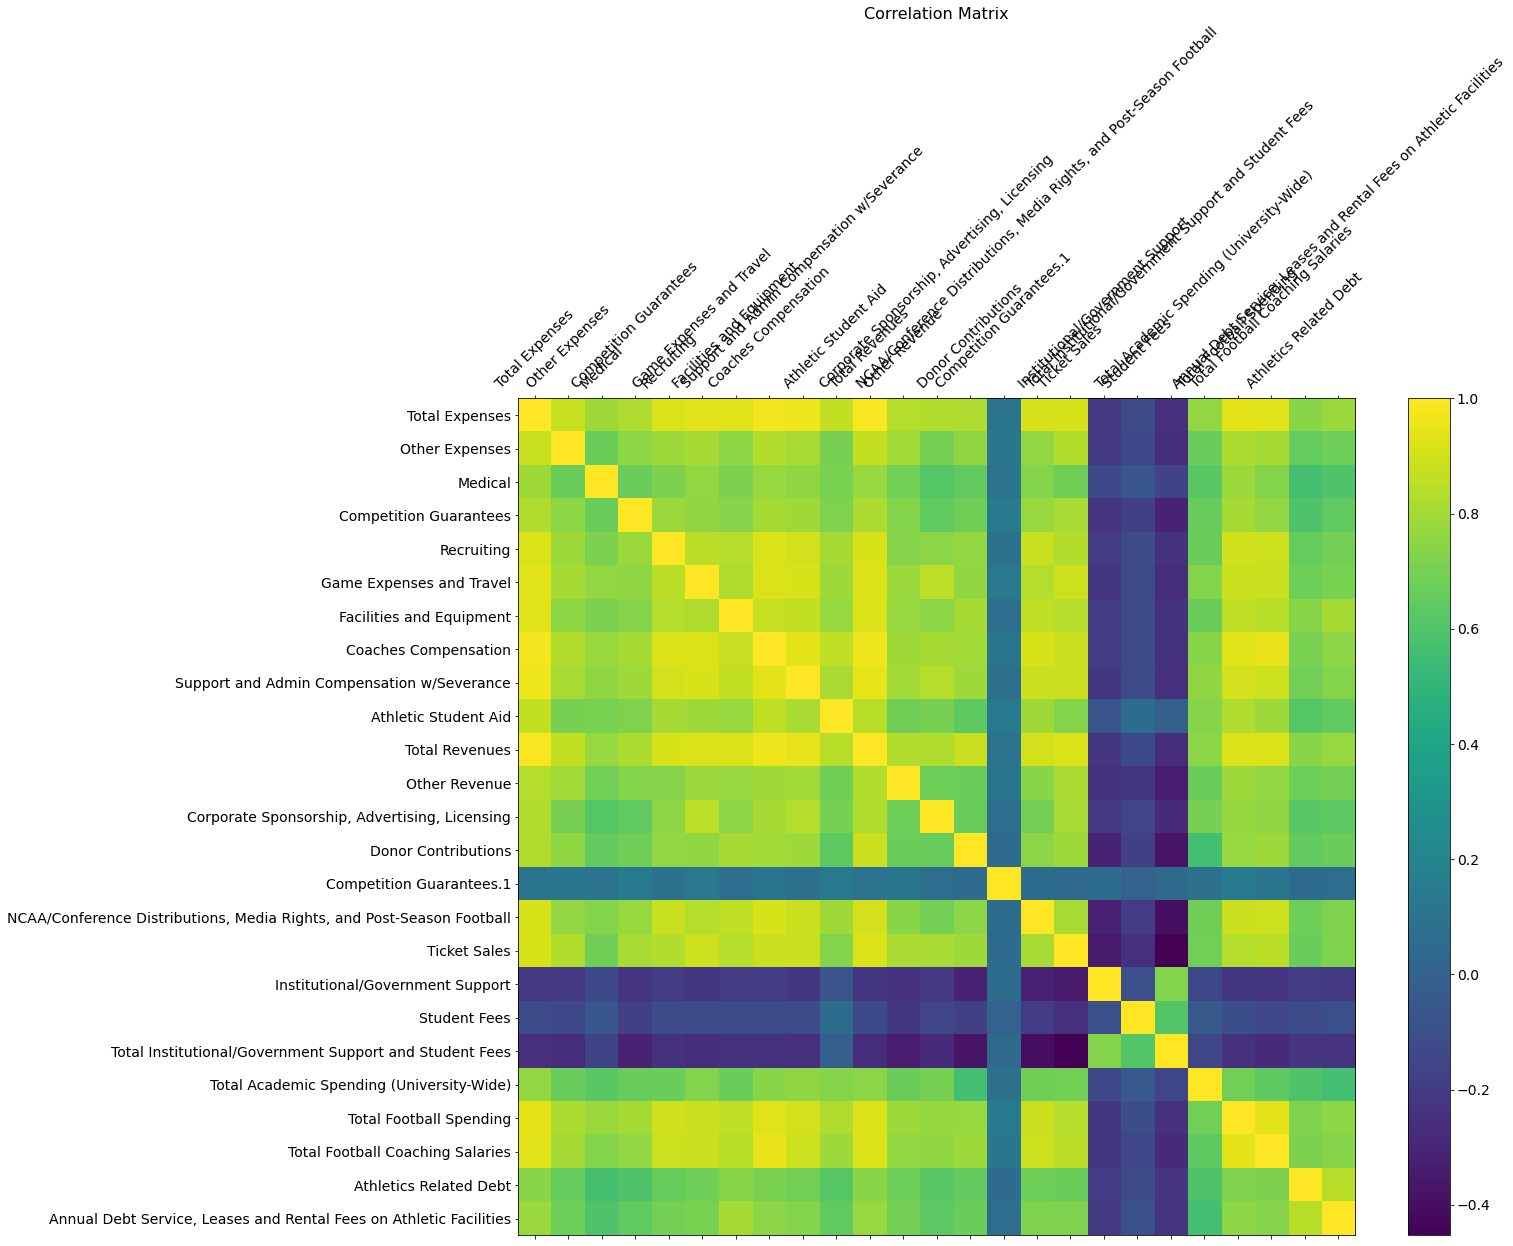

In [19]:
# Data Exploration: made a 
#try:
f = plt.figure(figsize=(19, 15))
plt.matshow(expenses_dropped_na.corr(), fignum=f.number)
plt.xticks(range(expenses_dropped_na.shape[1]), expenses_dropped_na.columns, fontsize=14, rotation=45)
plt.yticks(range(expenses_dropped_na.shape[1]), expenses_dropped_na, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
#except ZeroDivisionError:
    #print ("divide by zero")

In [ ]:
num = 0
for i in expenses_cleaned.columns:
   num += expenses_cleaned[i][expenses_cleaned[i]==0].count()
num

In [ ]:
expenses_cleaned.describe()

In [ ]:
expenses_cleaned = expenses_dropped.replace({'$': ''},regex=True)
expenses_cleaned.head(50)